In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# 0 Import Data

In [33]:
datafile = 'OnlineNewsPopularity.csv'
df = pd.read_csv(datafile)
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [3]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity  \
count               39644.000000             39644.000000   
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

In [19]:
df.columns = df.columns.str.replace(' ', '')
df.loc[:,'No_word'] = df.n_tokens_content.apply(lambda x: 1 if x==0 else 0)
topic_list = list(df.columns[df.columns.str.contains('LDA')])
all_below_point3 = list(df[topic_list][df[topic_list]<0.3].dropna().index)
df.loc[all_below_point3, 'all_topic'] = 1
df ['all_topic']= df['all_topic'].fillna(0)

# log_shares, Hierarchical Clustering

In [6]:
df['log_shares'] = np.log(df['shares'])

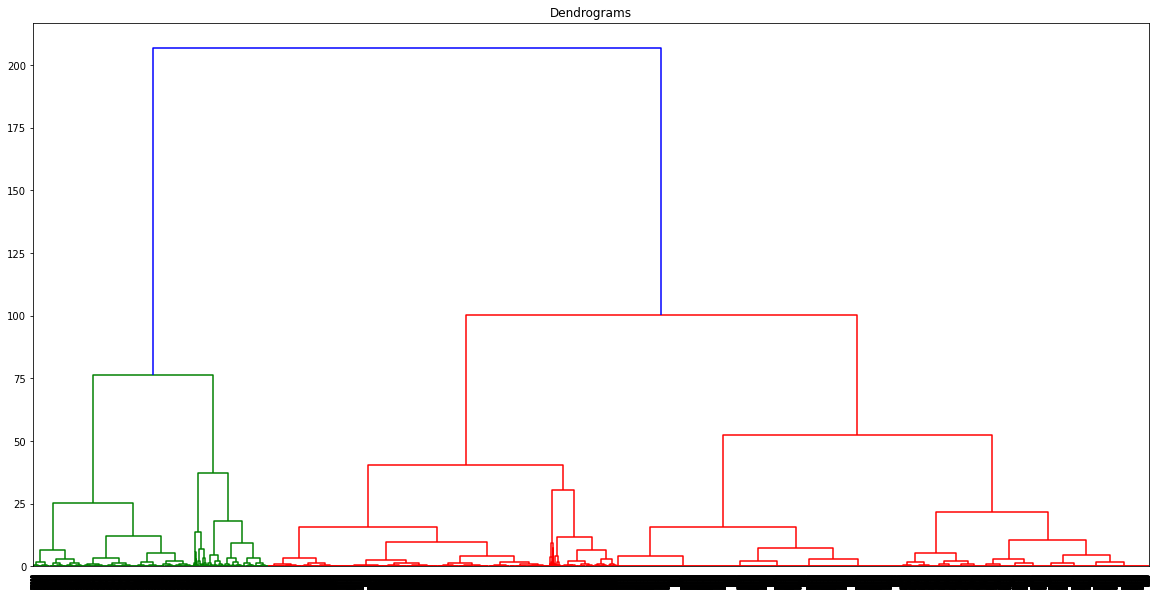

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")
dend= shc.dendrogram(shc.linkage(df[['log_shares']].values, method='ward'))

# shares, Hierarchical Clustering

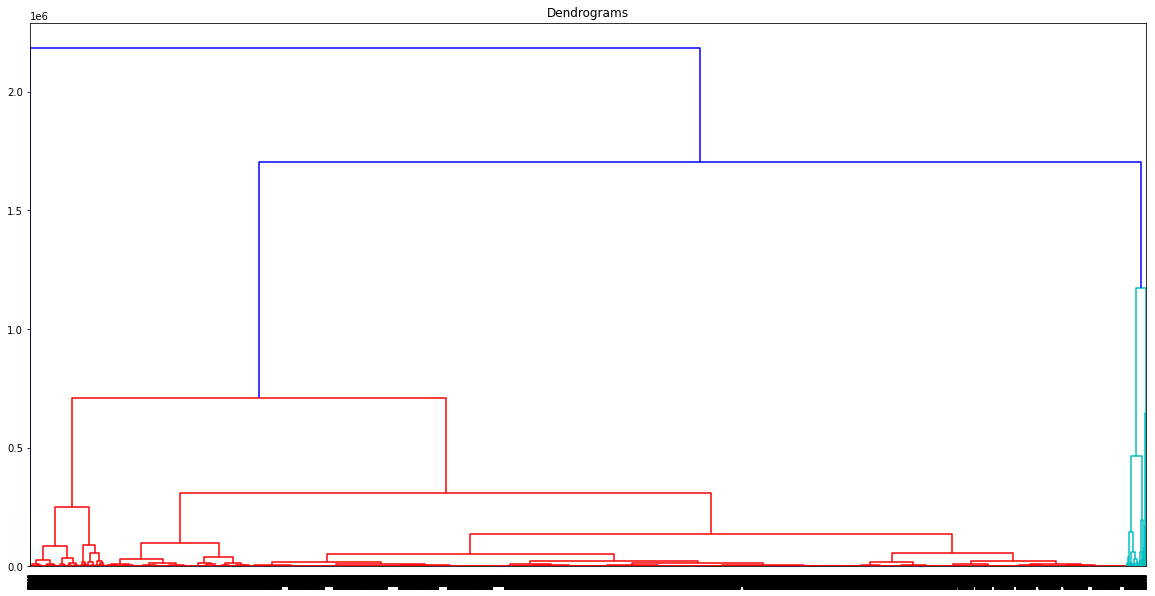

In [6]:
plt.figure(figsize=(20, 10))
plt.title("Dendrograms")
dend= shc.dendrogram(shc.linkage(df[[' shares']].values, method='ward'))

## Data Cleaning and Data Transformation

In [20]:
#outlier in var “n_unique_tokens”, “n_non_stop_words”, and “n_non_stop_unique_tokens”, 
#which might be due to typing error. We will remove that observation.
col_list = [4,5,6]
for col in col_list:
    print(df.columns[col])
    df = df[df[df.columns[col]]<1]

n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens


In [21]:
#Missing values are very troubling in this data set because they are coded as 0. 
#So you have to judge if the 0 are missing or real data. By check the distributions, 
#we found around 3000 observations with missing values in 9 different variables. 
#We will remove all cases with missing values.
col_list = [11,20,44,45,46,48,49,50,53]
for col in col_list:
    print(df.columns[col])
    df = df[df[df.columns[col]]!=0]

average_token_length
kw_max_min
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
rate_positive_words
rate_negative_words
avg_positive_polarity
avg_negative_polarity


In [22]:
#treat skewed data. 
#for those variables with all values bigger than 0, use log
#and other variable with 0, use square root.

col_list = [3,7,8,9,10,22,26,27,28,29,30,39,40,41,42,43,47,60] ######
for col in col_list:
    print(df.columns[col])
    if np.min(df[df.columns[col]]) > 0:
        col_name = 'log_'+df.columns[col]
        df[df.columns[col]] = np.log(df[df.columns[col]])
    else:
        col_name = 'sqrt_'+df.columns[col]
        df[df.columns[col]] = np.sqrt(df[df.columns[col]])   
    if df.columns[col] != ' shares':
        df.rename(columns={df.columns[col]:col_name}, inplace=True)

n_tokens_content
num_hrefs
num_self_hrefs
num_imgs
num_videos
kw_min_max
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_rate_negative_words
shares


In [23]:
features = ['sqrt_num_hrefs',  
            'sqrt_num_self_hrefs', 
            'average_token_length', 
            'log_kw_max_avg', 
            'log_kw_avg_avg', 
            'weekday_is_tuesday', 
            'weekday_is_friday',  
            'is_weekend', 
            'log_LDA_00', 
            'log_LDA_01',
            'log_LDA_02', 
            'log_LDA_03', 
            'log_LDA_04', 
            'global_subjectivity', 
            'global_sentiment_polarity', 
            'global_rate_positive_words',
            'log_global_rate_negative_words', 
            'rate_positive_words', 
            'avg_positive_polarity', 
            'avg_negative_polarity', 
            'title_subjectivity', 
            'title_sentiment_polarity', 
            
            'all_topic', 
            'No_word',
            
            'n_unique_tokens', 
            'sqrt_self_reference_min_shares', 
           ]

### 1. clustering by log_shares

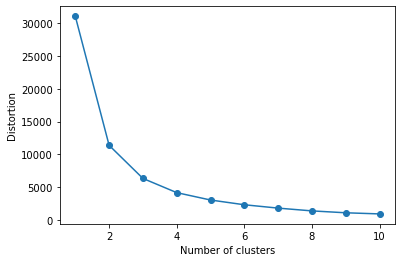

In [10]:
distortions=[]
centers=[]
labels=[]
for i in range(1, 11):
    km = KMeans(
    n_clusters=i, init='random',
    n_init=10, max_iter=300,
     tol=1e-04, random_state=0
     )
    km.fit(df[['log_shares']])
    distortions.append(km.inertia_)
    centers.append(km.cluster_centers_)
    labels.append(km.labels_)
 # plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:
df['labels_log_shares_N2']=labels[1]
df['labels_log_shares_N3']=labels[2]
df['labels_log_shares_N4']=labels[3]
df['labels_log_shares_N5']=labels[4]

In [12]:
for k in range(2):
    print(int(np.exp(min(df[df.labels_log_shares_N2==k].log_shares))),'~',int(np.exp(max(df[df.labels_log_shares_N2==k].log_shares))))
df.labels_log_shares_N2.value_counts()    

1 ~ 2499
2600 ~ 843299


0    26297
1     9977
Name: labels_log_shares_N2, dtype: int64

In [13]:
for k in range(3):
    print(int(np.exp(min(df[df.labels_log_shares_N3==k].log_shares))),'~',int(np.exp(max(df[df.labels_log_shares_N3==k].log_shares))))
df.labels_log_shares_N3.value_counts()   

5499 ~ 843299
1 ~ 1500
1599 ~ 5400


1    19458
2    12572
0     4244
Name: labels_log_shares_N3, dtype: int64

In [14]:
for k in range(4):
    print(int(np.exp(min(df[df.labels_log_shares_N4==k].log_shares))),'~',int(np.exp(max(df[df.labels_log_shares_N4==k].log_shares))))
df.labels_log_shares_N4.value_counts()   

1 ~ 999
2400 ~ 7500
1099 ~ 2300
7600 ~ 843299


2    14142
0    11262
1     7996
3     2874
Name: labels_log_shares_N4, dtype: int64

In [15]:
for k in range(5):
    print(int(np.exp(min(df[df.labels_log_shares_N5==k].log_shares))),'~',int(np.exp(max(df[df.labels_log_shares_N5==k].log_shares))))
df.labels_log_shares_N5.value_counts()   

10599 ~ 843299
1 ~ 872
3599 ~ 10499
1699 ~ 3499
873 ~ 1599


4    13295
3     8839
1     7212
2     5053
0     1875
Name: labels_log_shares_N5, dtype: int64

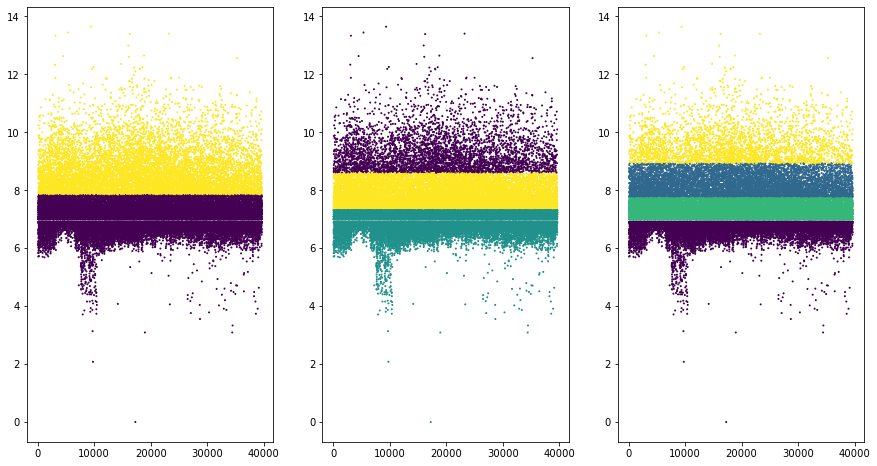

In [16]:
fig, (axs1,axs2,axs3) = plt.subplots(1,3, figsize=(15,8))

axs1.scatter(df.index, df.log_shares, c=df.labels_log_shares_N2,    s=1, cmap='viridis');
axs2.scatter(df.index, df.log_shares, c=df.labels_log_shares_N3,     s=1, cmap='viridis');
axs3.scatter(df.index, df.log_shares, c=df.labels_log_shares_N4,    s=1, cmap='viridis');

### clustering by selected features

In [17]:
features_clustering=features+['log_shares']
df_features=df[features_clustering]

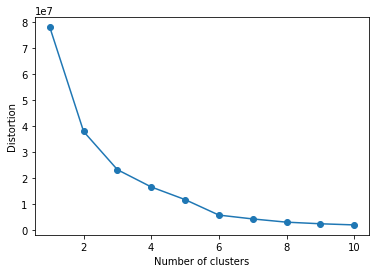

In [18]:
distortions=[]
centers=[]
labels=[]
for i in range(1, 11):
    km = KMeans(
    n_clusters=i, init='random',
    n_init=10, max_iter=300,
     tol=1e-04, random_state=0
     )
    km.fit(df_features)
    distortions.append(km.inertia_)
    centers.append(km.cluster_centers_)
    labels.append(km.labels_)
 # plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [20]:
df_features['labels_features_N2']=labels[1]
df_features['labels_features_N3']=labels[2]
df_features['labels_features_N4']=labels[3]

In [21]:
df_features.columns

Index(['sqrt_num_hrefs', 'sqrt_num_self_hrefs', 'average_token_length',
       'log_kw_max_avg', 'log_kw_avg_avg', 'weekday_is_tuesday',
       'weekday_is_friday', 'is_weekend', 'log_LDA_00', 'log_LDA_01',
       'log_LDA_02', 'log_LDA_03', 'log_LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'log_global_rate_negative_words', 'rate_positive_words',
       'avg_positive_polarity', 'avg_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'all_topic', 'No_word', 'n_unique_tokens',
       'sqrt_self_reference_min_shares', 'log_shares', 'labels_features_N2',
       'labels_features_N3', 'labels_features_N4'],
      dtype='object')

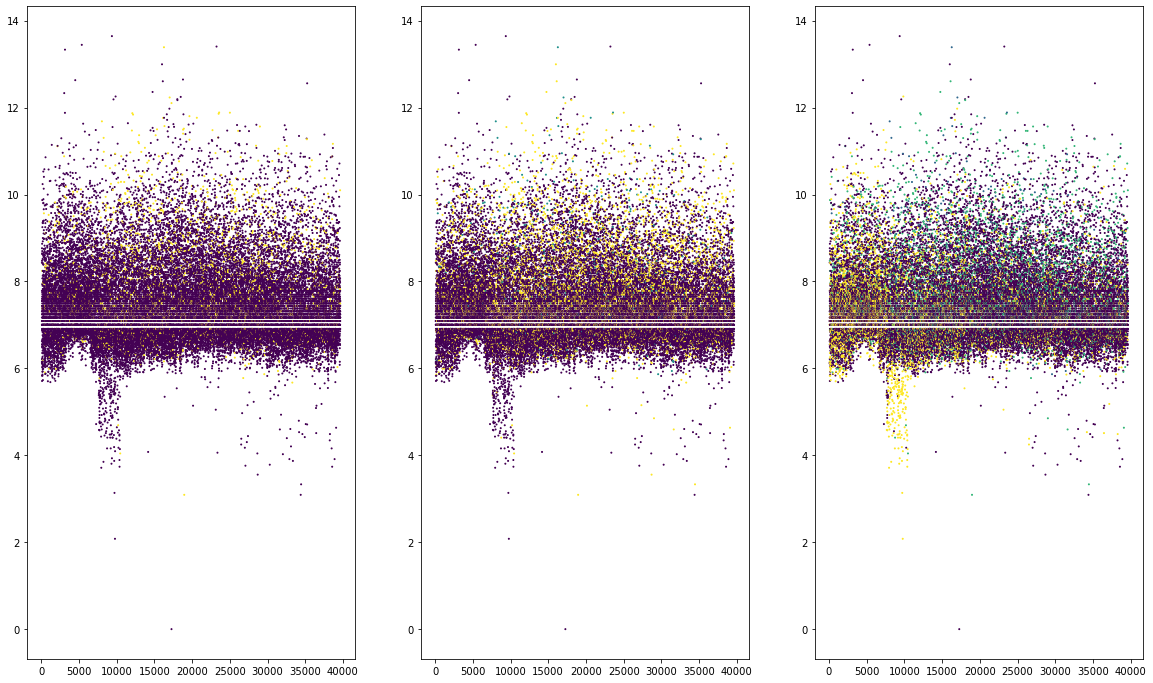

In [24]:
fig, (axs1,axs2,axs3) = plt.subplots(1,3, figsize=(20,12))

axs1.scatter(df_features.index, df_features['log_shares'], c=df_features.labels_features_N2,    s=1, cmap='viridis');
axs2.scatter(df_features.index, df_features['log_shares'], c=df_features.labels_features_N3,     s=1, cmap='viridis');
axs3.scatter(df_features.index, df_features['log_shares'], c=df_features.labels_features_N4,    s=1, cmap='viridis');

## Visualise 3D plots

In [34]:
df= pd.read_csv('OnlineNewsPopularity.csv')
# N=4
df['class_N4'] = 0
df.loc[(df[' shares']>=1050) & (df[' shares']<2350), 'class_N4'] = 1
df.loc[(df[' shares']>=2350) & (df[' shares']<7550), 'class_N4'] = 2
df.loc[df[' shares']>=7550, 'class_N4'] = 3

In [35]:
df.columns = df.columns.str.replace(' ', '')
df.loc[:,'No_word'] = df.n_tokens_content.apply(lambda x: 1 if x==0 else 0)
topic_list = list(df.columns[df.columns.str.contains('LDA')])
all_below_point3 = list(df[topic_list][df[topic_list]<0.3].dropna().index)
df.loc[all_below_point3, 'all_topic'] = 1
df ['all_topic']= df['all_topic'].fillna(0)

In [36]:
#outlier (>1) in var “n_unique_tokens”, “n_non_stop_words”, and “n_non_stop_unique_tokens”, 
#which might be due to typing error. We will remove that observation.
col_list = [4,5,6]
for col in col_list:
    print(df.columns[col])
    df = df[df[df.columns[col]]<1]

n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens


In [37]:
#Missing values are very troubling in this data set because they are coded as 0. 
#So you have to judge if the 0 are missing or real data. By check the distributions, 
#we found around 3000 observations with missing values in 9 different variables. 
#We will remove all cases with missing values.
col_list = [11,20,44,45,46,48,49,50,53]
for col in col_list:
    print(df.columns[col])
    df = df[df[df.columns[col]]!=0]

average_token_length
kw_max_min
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
rate_positive_words
rate_negative_words
avg_positive_polarity
avg_negative_polarity


In [38]:
#treat skewed data. 
#for those variables with all values bigger than 0, use log
#and other variable with 0, use square root.

col_list = [3,7,8,9,10,22,26,27,28,29,30,39,40,41,42,43,47,60] ######
for col in col_list:
    print(df.columns[col])
    if np.min(df[df.columns[col]]) > 0:
        col_name = 'log_'+df.columns[col]
        df[df.columns[col]] = np.log(df[df.columns[col]])
    else:
        col_name = 'sqrt_'+df.columns[col]
        df[df.columns[col]] = np.sqrt(df[df.columns[col]])   
    if df.columns[col] != ' shares':
        df.rename(columns={df.columns[col]:col_name}, inplace=True)


n_tokens_content
num_hrefs
num_self_hrefs
num_imgs
num_videos
kw_min_max
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_rate_negative_words
shares


In [39]:
len(features)

26

In [53]:
X= df.copy()

In [54]:
X['log_shares']

79       6.626718
80       6.148468
81       8.433812
82       7.170120
83       7.090077
           ...   
39638    7.090077
39639    7.495542
39640    7.549609
39641    7.549609
39643    7.170120
Name: log_shares, Length: 36274, dtype: float64

In [55]:
with pd.option_context('display.max_columns', None):
    display(X[features])

sqrt_num_hrefs  sqrt_num_self_hrefs  average_token_length  \
79           2.236068             1.414214              4.381944   
80           2.828427             0.000000              4.980676   
81           2.000000             1.414214              4.477612   
82           2.236068             2.000000              4.608541   
83           3.741657             1.000000              5.084168   
...               ...                  ...                   ...   
39638        2.236068             1.732051              4.923767   
39639        3.000000             2.645751              4.523121   
39640        3.000000             2.645751              4.405488   
39641        4.898979             1.000000              5.076923   
39643        1.000000             1.000000              4.471338   

       log_kw_max_avg  log_kw_avg_avg  weekday_is_tuesday  weekday_is_friday  \
79           7.610529        6.690072                 1.0                0.0   
80           7.610529        6.590617                 1.0                0.0   
81           7.748665        7.077127                 1.0                0.0   
82           7.610529        7.015734                 1.0                0.0   
83           7.693140        6.785420                 1.0                0.0   
...               ...             ...                 ...                ...   
39638        8.366680        7.888227                 0.0                0.0   
39639        8.295135        8.016686                 0.0                0.0   
39640        8.607065        8.134954                 0.0                0.0   
39641        8.836474        8.344372                 0.0                0.0   
39643        8.192436        8.100741                 0.0                0.0   

       is_weekend  log_LDA_00  log_LDA_01  log_LDA_02  log_LDA_03  log_LDA_04  \
79            0.0   -3.386344   -3.369980   -0.148601   -3.400045   -3.310647   
80            0.0   -3.401182   -3.401193   -0.356638   -1.609580   -3.401144   
81            0.0   -3.903864   -2.118623   -3.911954   -3.910490   -0.198930   
82            0.0   -2.995638   -0.644432   -1.126990   -2.975382   -2.995732   
83            0.0   -3.899651   -2.018745   -2.118040   -3.907417   -0.347334   
...           ...         ...         ...         ...         ...         ...   
39638         0.0   -0.595407   -3.401082   -3.400781   -3.401146   -1.053708   
39639         0.0   -3.687370   -3.688855   -1.885843   -3.688875   -0.257139   
39640         0.0   -3.528507   -3.555225   -1.461595   -0.383261   -3.555208   
39641         0.0   -1.838823   -3.687893   -3.680620   -0.440377   -1.917527   
39643         0.0   -2.995707   -0.223970   -2.995724   -2.982644   -2.995720   

       global_subjectivity  global_sentiment_polarity  \
79                0.449868                   0.155556   
80                0.343411                   0.010174   
81                0.406818                   0.135795   
82                0.434218                   0.089925   
83                0.394949                   0.091540   
...                    ...                        ...   
39638             0.552041                   0.268878   
39639             0.482679                   0.141964   
39640             0.564374                   0.194249   
39641             0.510296                   0.024609   
39643             0.517893                   0.104892   

       global_rate_positive_words  log_global_rate_negative_words  \
79                       0.041667                       -4.564348   
80                       0.028986                       -3.253277   
81                       0.022388                       -4.897840   
82                       0.046263                       -3.846595   
83                       0.028056                       -4.603168   
...                           ...                             ...   
39638                    0.031390                       -5.407172   
39639              

In [47]:
# standard scaler 
num_cols = ['sqrt_num_hrefs', 'sqrt_num_self_hrefs', 'average_token_length', 'log_kw_max_avg',
           'log_kw_avg_avg', 'log_LDA_00', 'log_LDA_01', 'log_LDA_02', 'log_LDA_03', 'log_LDA_04',
           'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'log_global_rate_negative_words',
           'rate_positive_words', 'avg_positive_polarity', 'avg_negative_polarity', 'title_subjectivity',
           'title_sentiment_polarity', 'n_unique_tokens', 'sqrt_self_reference_min_shares']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
X [num_cols] = scaler.fit_transform (X[num_cols])
X.head()

url  timedelta  \
79  http://mashable.com/2013/01/08/artist-drone-pi...      730.0   
80  http://mashable.com/2013/01/08/japanese-cat-bo...      730.0   
81   http://mashable.com/2013/01/08/lego-iphone-case/      730.0   
82  http://mashable.com/2013/01/08/nfl-arian-foste...      730.0   
83  http://mashable.com/2013/01/08/personal-for-ed...      730.0   

    n_tokens_title  log_n_tokens_content  n_unique_tokens  n_non_stop_words  \
79            12.0              5.662960         0.467427               1.0   
80            10.0              6.025866         0.640578               1.0   
81            11.0              4.897840         1.595114               1.0   
82            11.0              5.638355         0.679744               1.0   
83            12.0              6.212606        -0.296726               1.0   

    n_non_stop_unique_tokens  sqrt_num_hrefs  sqrt_num_self_hrefs  \
79                  0.726190       -0.639348            -0.231901   
80                  0.777344       -0.201798            -1.808582   
81                  0.785714       -0.813722            -0.231901   
82                  0.766467       -0.639348             0.421181   
83                  0.662252        0.472766            -0.693700   

    sqrt_num_imgs  ...  min_negative_polarity  max_negative_polarity  \
79            0.0  ...                  -0.80                  -0.10   
80            1.0  ...                  -0.70                  -0.05   
81            3.0  ...                  -0.15                  -0.15   
82            1.0  ...                  -0.50                  -0.05   
83            1.0  ...                  -0.50                  -0.10   

    title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
79           -0.867704                 -0.266568                     0.5   
80            0.056918                  0.488091                     0.2   
81           -0.867704                 -0.266568                     0.5   
82           -0.867704                 -0.266568                     0.5   
83            0.056918                 -0.266568                     0.2   

    abs_title_sentiment_polarity  log_shares  class_N4  No_word  all_topic  
79                           0.0    6.626718         0        0        0.0  
80                           0.2    6.148468         0        0        0.0  
81                           0.0    8.433812         2        0        0.0  
82                           0.0    7.170120         1        0        0.0  
83                           0.0    7.090077         1        0        0.0  

[5 rows x 64 columns]

In [56]:
# t-sne
## random choices 

cluster_0 = np.array (X[X.class_N4==0].index)
cluster_1 = np.array (X[X.class_N4==1].index)
cluster_2 = np.array (X[X.class_N4==2].index)
cluster_3 = np.array (X[X.class_N4==3].index)


# 用 np.random.choice 从非 fraud 中随机选取 与fraud 相同数量的数据
random_cluster0 = np.random.choice (cluster_0, 300, replace = False )
random_cluster1 = np.random.choice (cluster_1, 300, replace = False )
random_cluster2 = np.random.choice (cluster_2, 300, replace = False )
random_cluster3 = np.random.choice (cluster_3, 300, replace = False )

under_sample_indices = np.concatenate ([random_cluster0, random_cluster1, random_cluster2, random_cluster3])
under_sample_data = X.loc[under_sample_indices,:]

# 分出 undersample 数据的 X 与Y 值
X_undersample = under_sample_data[features]
y_undersample = under_sample_data['log_shares']
color = under_sample_data.class_N4

from sklearn.manifold import TSNE
p = TSNE(n_components=2, random_state=24).fit_transform(X_undersample)

In [57]:
result = pd.DataFrame(columns =['x_tsne', 'y_tsne','cluster','log_shares'])
result['x_tsne'] = p[:,0]
result['y_tsne'] = p[:,1]
result['cluster'] = np.array(color)
result['log_shares'] = np.array(y_undersample)

In [51]:
#with scaling
result.head()

x_tsne     y_tsne  cluster  log_shares
0  13.581858 -20.415447        0    6.461468
1 -19.478329  -6.536394        0    5.572154
2  -9.120804 -27.418043        0    6.854355
3   7.056240 -10.605681        0    6.498282
4 -23.164114 -10.897014        0    3.737670

In [58]:
#without scaling 
result.head()
#indices are randomly picked, 

x_tsne     y_tsne  cluster  log_shares
0  16.891930  18.170954        0    6.525030
1 -14.962914  56.843464        0    6.709304
2 -31.699379  -5.311140        0    6.709304
3 -29.647297 -11.879569        0    6.602588
4  16.805964  14.021535        0    6.842683

In [52]:
#after scaling 
#3D plot     
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import plotly.express as px
#3D plot     
fig = px.scatter_3d(result,  x='x_tsne', y='y_tsne', z='log_shares',
    color="cluster",  opacity = 0.7, labels='cluster')

fig.write_html("3D with cluster.html")
fig.show()

In [59]:
#without scaling
#3D plot     
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import plotly.express as px
#3D plot     
fig = px.scatter_3d(result,  x='x_tsne', y='y_tsne', z='log_shares',
    color="cluster",  opacity = 0.7, labels='cluster')

fig.write_html("3D with cluster without scaled.html")
fig.show()